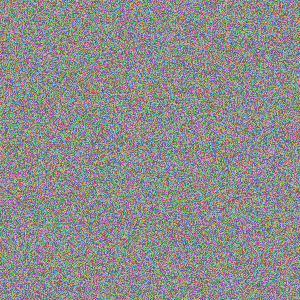

开始做梦......
Step 10 / 100, loss 1.2162691354751587
Step 20 / 100, loss 2.1789979934692383
Step 30 / 100, loss 3.075573682785034
Step 40 / 100, loss 3.9168810844421387
Step 50 / 100, loss 4.410070896148682
Step 60 / 100, loss 4.9627156257629395
Step 70 / 100, loss 5.5467529296875
Step 80 / 100, loss 5.804568767547607
Step 90 / 100, loss 6.181858062744141
Step 100 / 100, loss 6.438094615936279
梦醒时分......


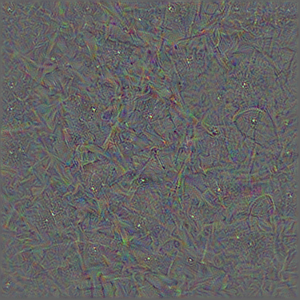

In [1]:
import tensorflow as tf
import numpy as np
import IPython.display as display
import PIL.Image
import time
from tensorflow.keras.preprocessing import image
#图像标准化
def normalize_image(img):
    img = 255*(img + 1.0)/2.0
    return tf.cast(img,tf.uint8)
#图像可视化
def show_image(img):
    display.display(PIL.Image.fromarray(np.array(img)))
#保存图像文件
def save_image(img,file_name):
    PIL.Image.fromarray(np.array(img)).save(file_name)

base_model=tf.keras.applications.InceptionV3(include_top=False, weights='imagenet')
layer_names='conv2d_85'
layers=base_model.get_layer(layer_names).output
dream_model = tf.keras.Model(inputs=base_model.input,outputs=layers)
#计算损失
def calc_loss(img,model):
    channels=[13,139]
    img=tf.expand_dims(img,axis=0)
    layer_activations=model(img)
    losses=[]
    for cn in channels:
        act=layer_activations[:,:,:,cn]
        loss=tf.math.reduce_mean(act)
        losses.append(loss)
    return tf.reduce_sum(losses)
#定义图像优化过程函数
def render_deepdream(model,img,steps=100,step_size=0.01,verbose=1):
    for n in tf.range(steps):
        with tf.GradientTape() as tape:
            tape.watch(img)
            loss=calc_loss(img,model)
        gradients=tape.gradient(loss,img)
        gradients/=tf.math.reduce_std(gradients) + 1e-8
        img=img+gradients*step_size
        img=tf.clip_by_value(img,-1,1)
        if(verbose==1):
            if((n+1)%10==0):
                print("Step {} / {}, loss {}".format(n+1,steps,loss))
    return img
#定义噪声图像
img_noise=np.random.uniform(size=(300,300,3))+100.0
img_noise=img_noise.astype(np.float32)
show_image(normalize_image(img_noise))
img=tf.keras.applications.inception_v3.preprocess_input(img_noise)
img=tf.convert_to_tensor(img)
#开始做梦
start=time.time()
print("开始做梦......")
dream_img=render_deepdream(dream_model,img,steps=100,step_size=0.01)
end=time.time()
end-start
print("梦醒时分......")
dream_img=normalize_image(dream_img)
show_image(dream_img)